In [1]:
from kmeans import *
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score
from kneed import KneeLocator

import warnings

In [2]:
# cette option permet d'ignorer les avertissements (pour une meilleure visualisation) 
warnings.filterwarnings('ignore')

## Récupération des données du dataset Iris
    Séparation des variables : Sélection des features et de la target
    Mélange des données pour éviter les biais de sélection des données
    

In [3]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
names = iris.target_names
X, y = shuffle(X, y)

## Application de la fonction K-means de Sklearn au dataset Iris
    3 clusters (k=3)

In [4]:
kmeans = KMeans(n_clusters=3)

In [5]:
iris_kmeans = kmeans.fit(X)

In [6]:
conf_matrix = confusion_matrix(y, iris_kmeans.labels_)

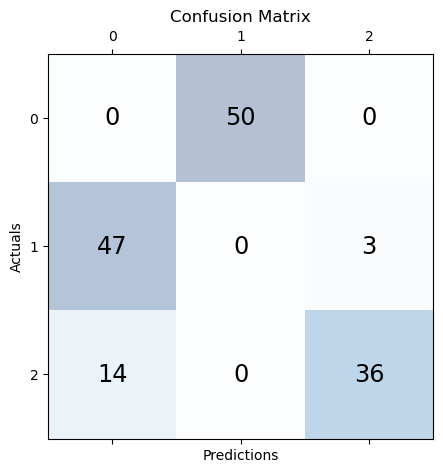

In [7]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix')
plt.show()

### Visualisation du clustering
    Comparatif: Predictions / Valeurs actuelles

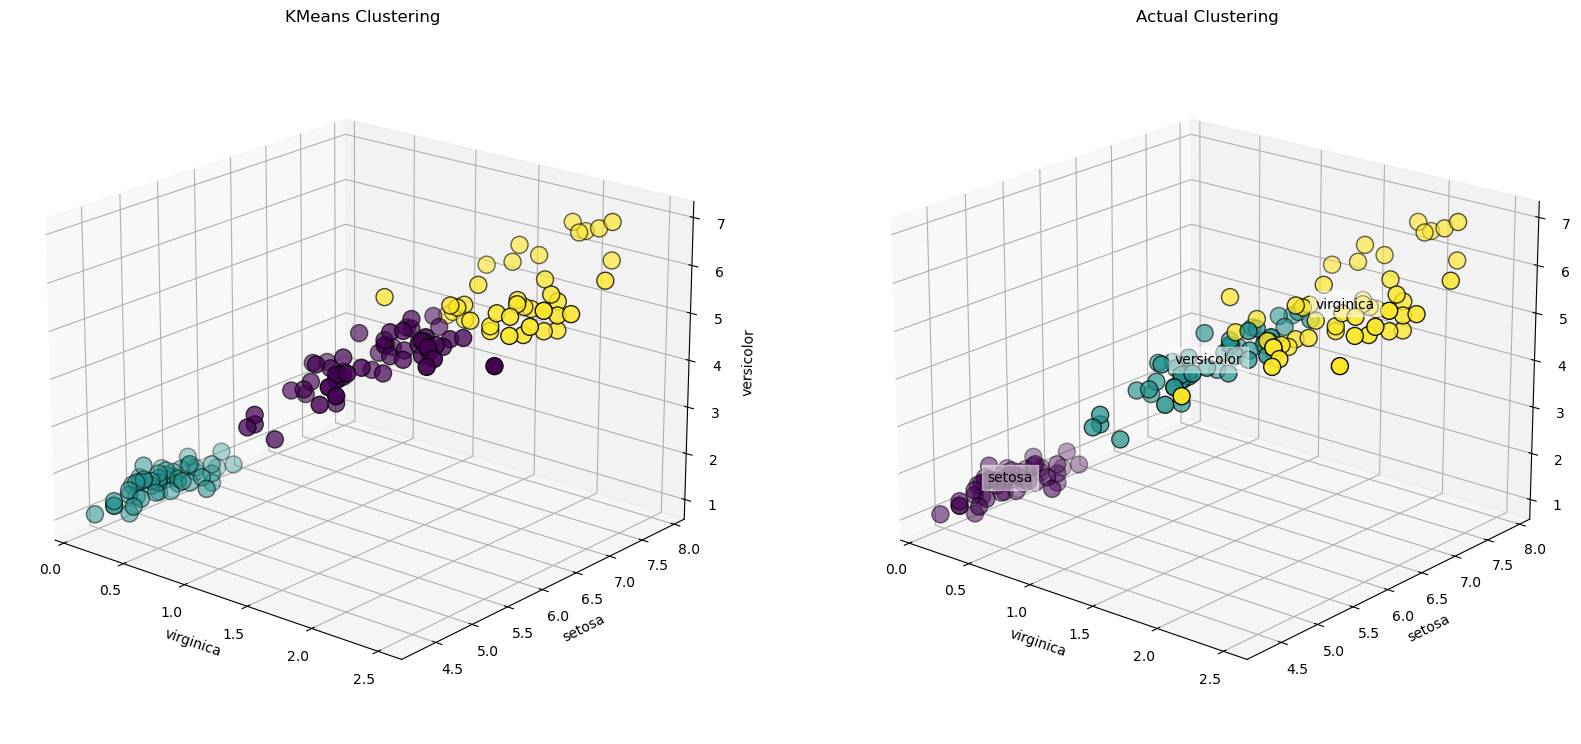

In [8]:
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(X[:, 3], X[:, 0], X[:, 2], c=iris_kmeans.labels_.astype(float), edgecolor='k', s=150, cmap='viridis')
ax1.view_init(20, -50)
ax1.set_xlabel(names[2])
ax1.set_ylabel(names[0])
ax1.set_zlabel(names[1])
ax1.set_title('KMeans Clustering')

ax2 = fig.add_subplot(1, 2, 2, projection='3d')

for label, name in enumerate(names):
    ax2.text3D(
        X[y == label, 3].mean(),
        X[y == label, 0].mean(),
        X[y == label, 2].mean(),
        name,
        horizontalalignment='center',
        bbox=dict(alpha=.5, edgecolor='w', facecolor='w')
    )

ax2.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k', s=150, cmap='viridis')
ax2.view_init(20, -50)
ax2.set_xlabel(names[2])
ax2.set_ylabel(names[0])
ax2.set_zlabel(names[1])
ax2.set_title('Actual Clustering')
plt.show()

## Application de mon algo au dataset Iris

In [9]:
df = pd.DataFrame(X)

- ### k = 2

In [10]:
my2Means = MyKMeans(2, df)

In [11]:
iris_2means, centroids_2 = my2Means.fit()

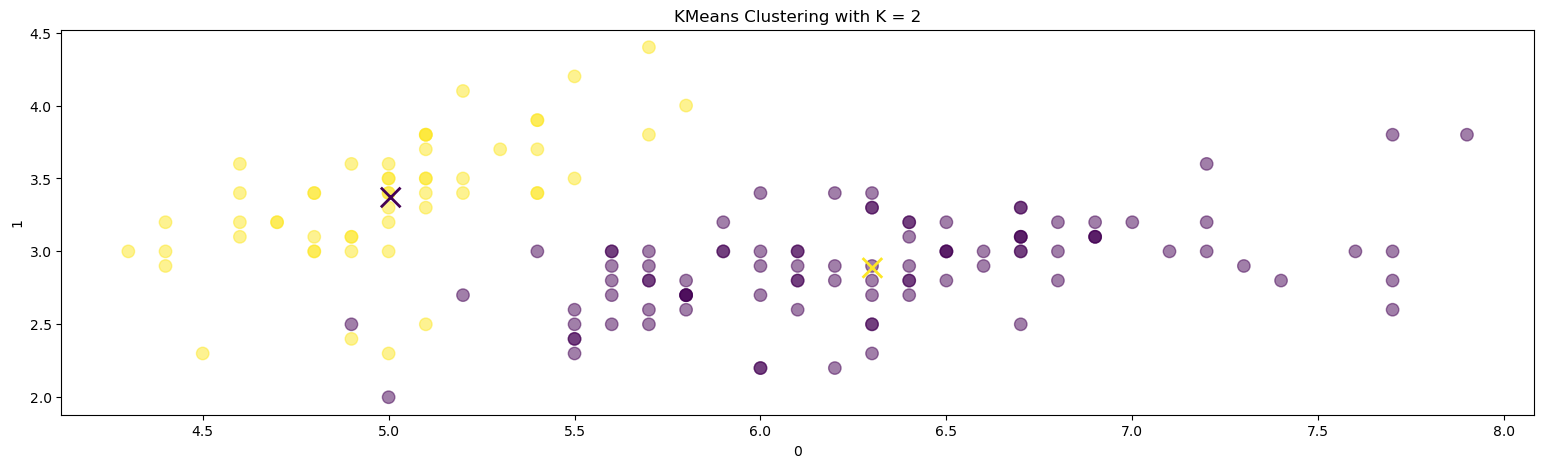

In [12]:
my2Means.plot(iris_2means, centroids_2)

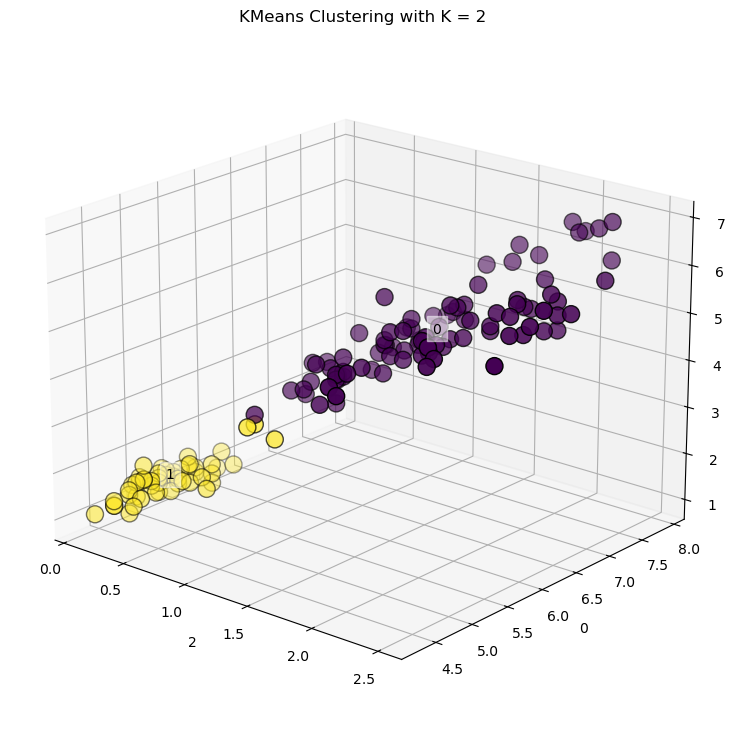

In [13]:
my2Means.plot_3D(iris_2means)

- ### k = 3

In [14]:
my3Means = MyKMeans(3, df)
my3Means_2 = MyKMeans(3, df)

In [15]:
iris_3means, centroids_3 = my3Means.fit()
iris_3means_2, centroids_3_2 = my3Means_2.fit()

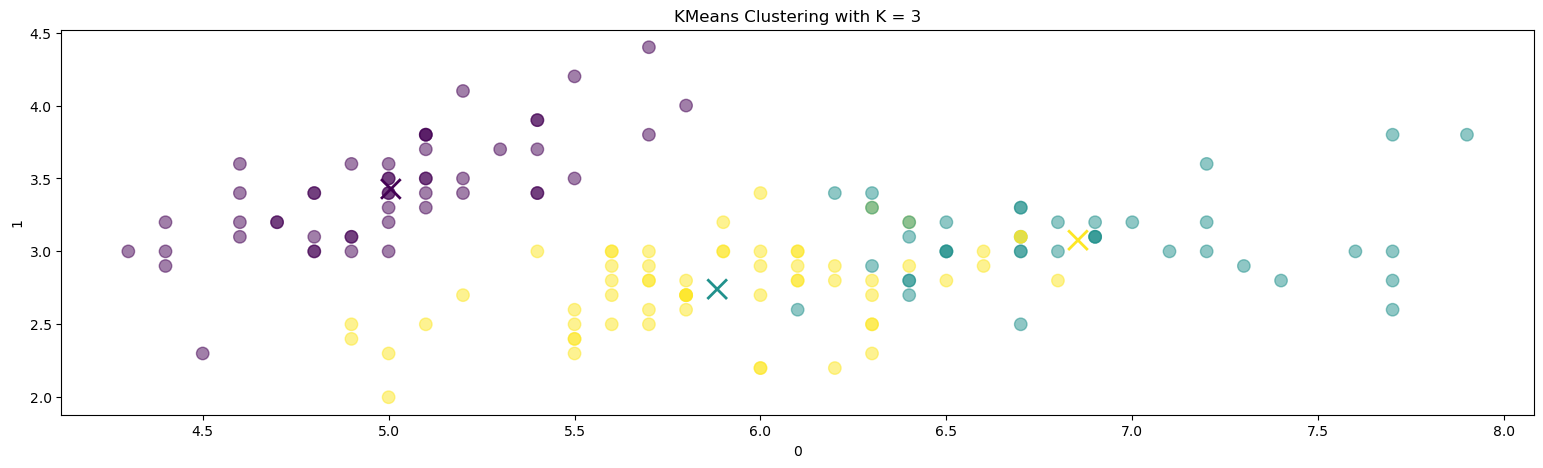

In [16]:
my3Means.plot(iris_3means, centroids_3)

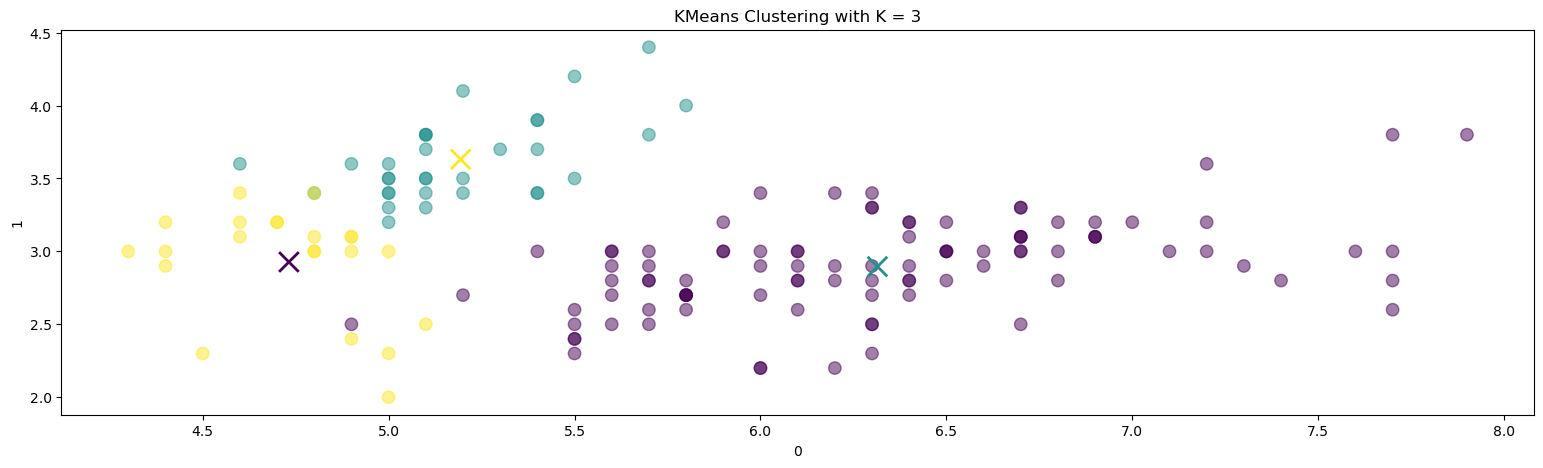

In [17]:
my3Means_2.plot(iris_3means_2, centroids_3_2)

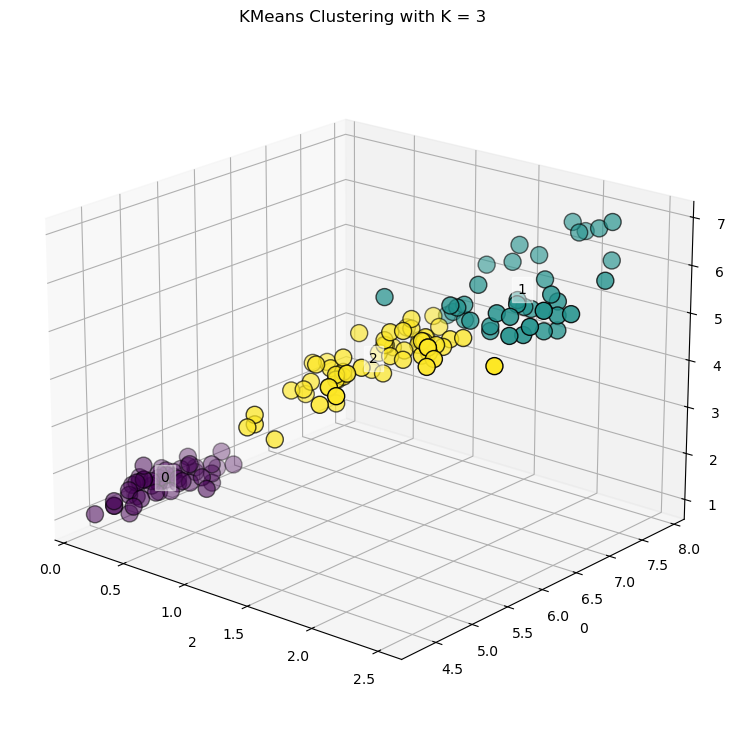

In [18]:
my3Means.plot_3D(iris_3means)

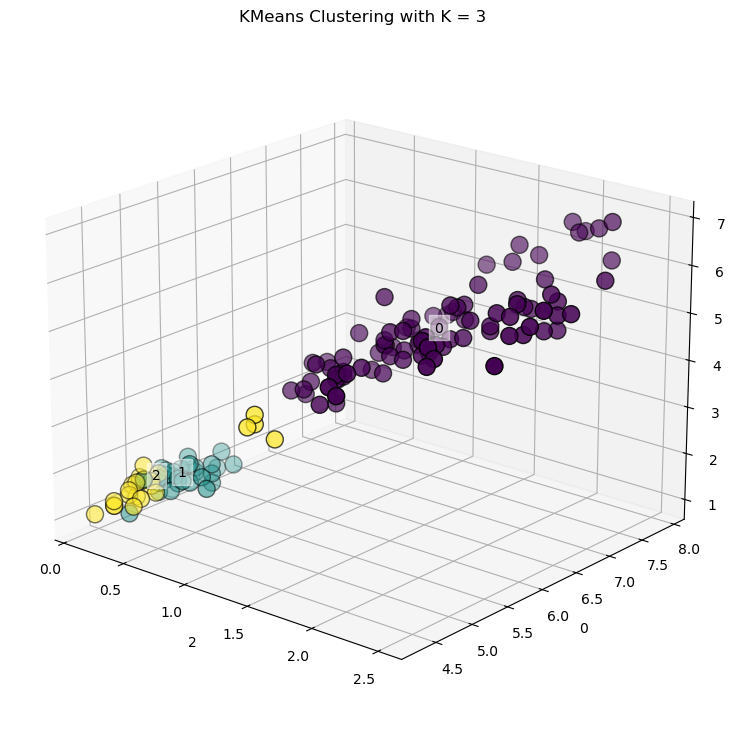

In [19]:
my3Means_2.plot_3D(iris_3means_2)

**L'algorithme est non déterministe, après plusieurs relance de celui-ci, on note que les clusters obtenus peuvent changer légèrement.**

- ### k = 5

In [20]:
my5Means = MyKMeans(5, df)

In [21]:
iris_5means, centroids_5 = my5Means.fit()

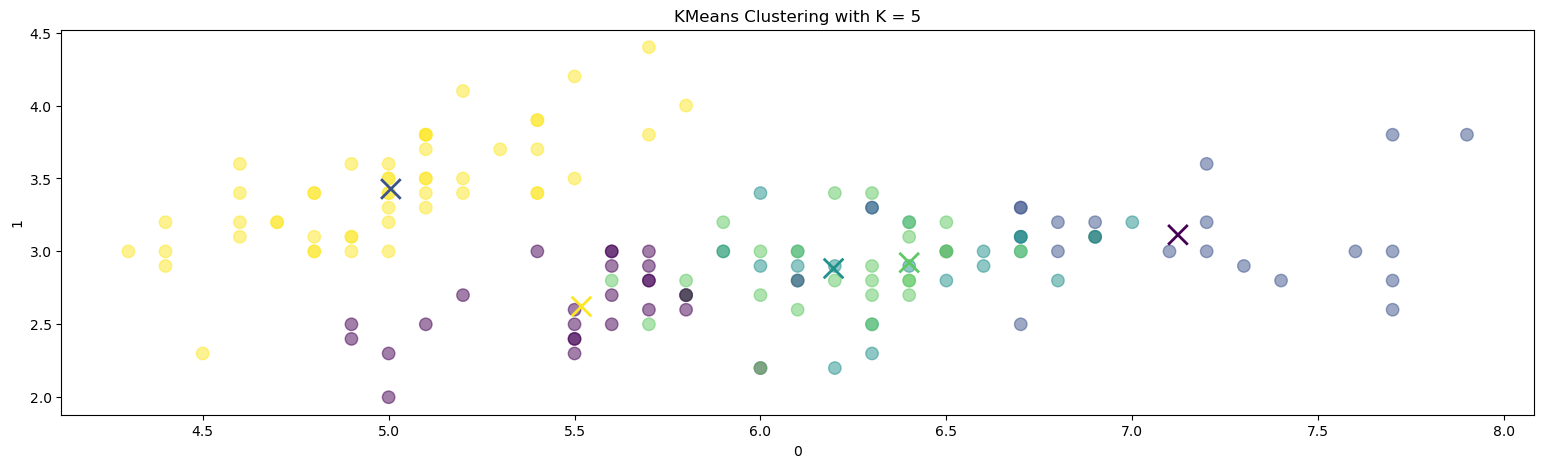

In [22]:
my5Means.plot(iris_5means, centroids_5)

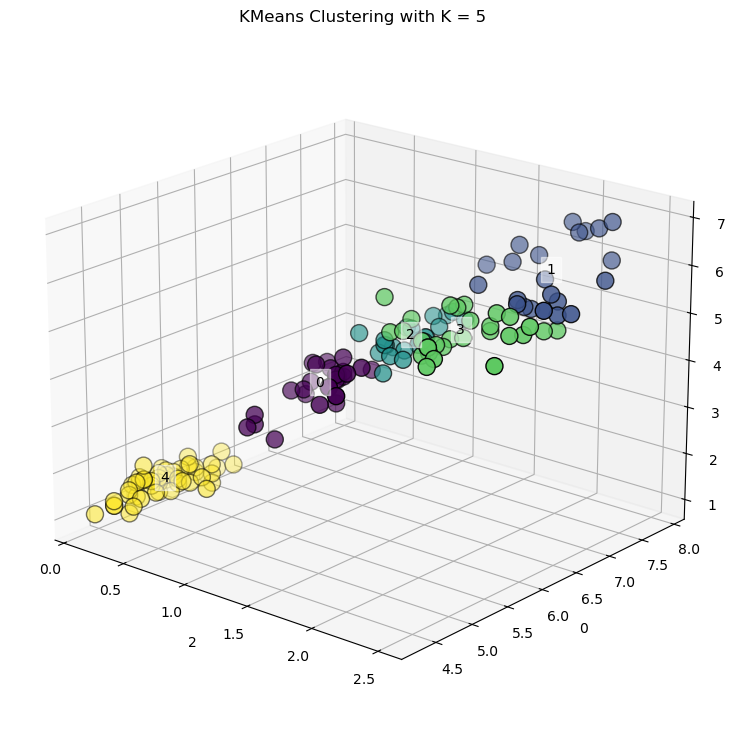

In [23]:
my5Means.plot_3D(iris_5means)

- ### k = 10

In [24]:
my10Means = MyKMeans(10, df)

In [25]:
iris_10means, centroids_10 = my10Means.fit()

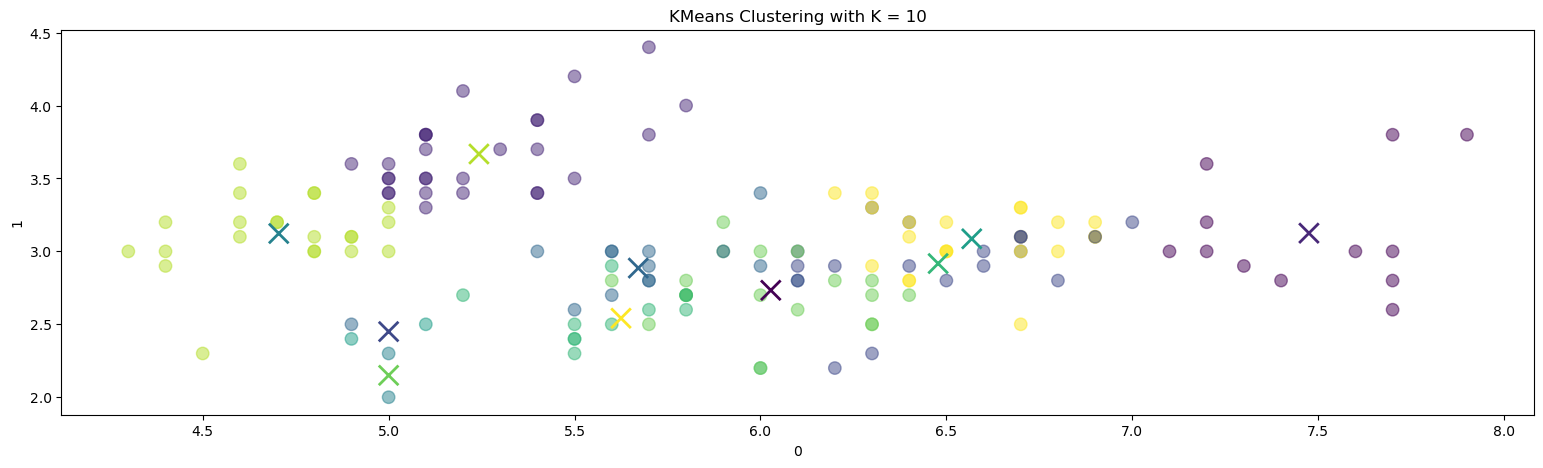

In [26]:
my10Means.plot(iris_10means, centroids_10)

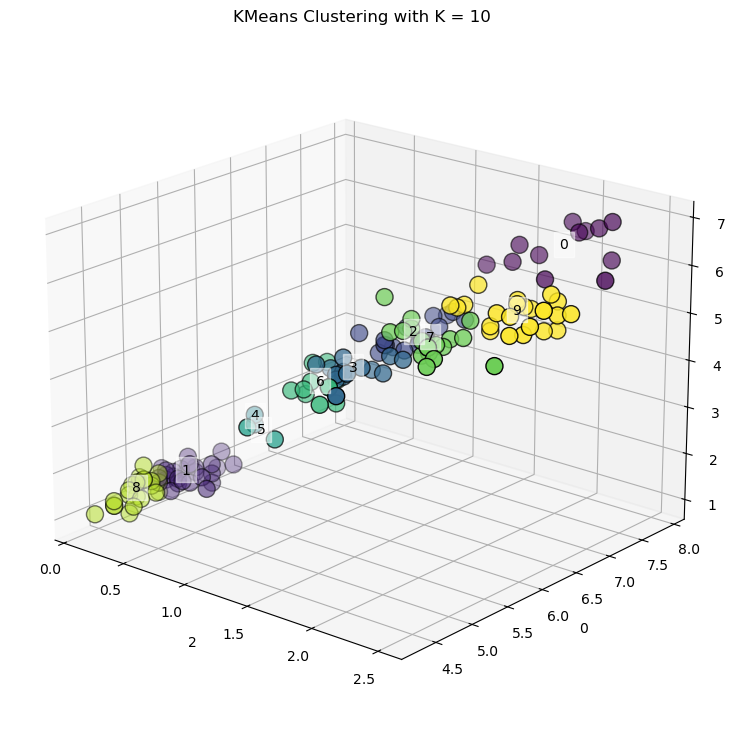

In [27]:
my10Means.plot_3D(iris_10means)

## Observation : 
    Comparaison en fonction de la valeur 'error' (valeur de distance entre les points et les centroides des clusters)

In [28]:
centroids_2

,0,1,2,3,error
0,6.301031,2.886598,4.958763,1.695876,3.434715
1,5.005660,3.369811,1.560377,0.290566,1.233702


In [29]:
centroids_3

,0,1,2,3,error
0,5.006000,3.428000,1.462000,0.246000,0.205793
1,6.853846,3.076923,5.715385,2.053846,0.790907
2,5.883607,2.740984,4.388525,1.434426,0.712179


In [30]:
centroids_5

,0,1,2,3,error
0,5.518519,2.622222,3.951852,1.218519,0.219476
1,7.122727,3.113636,6.031818,2.131818,0.411025
2,6.400000,2.922727,4.586364,1.440909,0.076568
3,6.196552,2.882759,5.182759,1.934483,0.121340
4,5.006000,3.428000,1.462000,0.246000,0.205793


In [31]:
centroids_10

,0,1,2,3,error
0,7.475000,3.125000,6.300000,2.050000,0.199974
1,5.242857,3.667857,1.500000,0.282143,0.051990
2,6.477778,2.916667,4.600000,1.422222,0.063982
3,5.671429,2.885714,4.314286,1.392857,0.082215
4,5.000000,2.150000,3.400000,1.000000,0.001056
5,5.000000,2.450000,3.150000,1.050000,0.001406
6,5.625000,2.541667,3.866667,1.158333,0.023940
7,6.027778,2.733333,5.027778,1.794444,0.054199
8,4.704545,3.122727,1.413636,0.200000,0.047423
9,6.568182,3.086364,5.536364,2.163636,0.052481


In [32]:
mods = [
    my2Means,
    my3Means,
    my5Means,
    my10Means
    ]

clf_columns = []
clf_compare = pd.DataFrame(columns = clf_columns)

row_index = 0
for mod in mods:
    clusters = mod.k
    clf_compare.loc[row_index,'Clusters'] = clusters
    clf_compare.loc[row_index,'Total error'] = mod.total_error
    row_index+=1
    
clf_compare.sort_values(by = ['Total error'], ascending = False, inplace = True)    
clf_compare

,Clusters,Total error
0,2.0,398.553506
1,3.0,84.577942
2,5.0,30.461416
3,10.0,9.623761


**Le "Total error" représente la somme des distances euclidiennes entre chaque points et son centroïde associé.  
On observe une nette déclinaison du total d'erreur en fonction de l'incrémentation de clusters.**

## Détermination du nombre idéal de clusters :
    Méthode de coude : l'inertie

In [33]:
k_values = range(1, 11)
errors = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    errors.append(kmeans.inertia_)

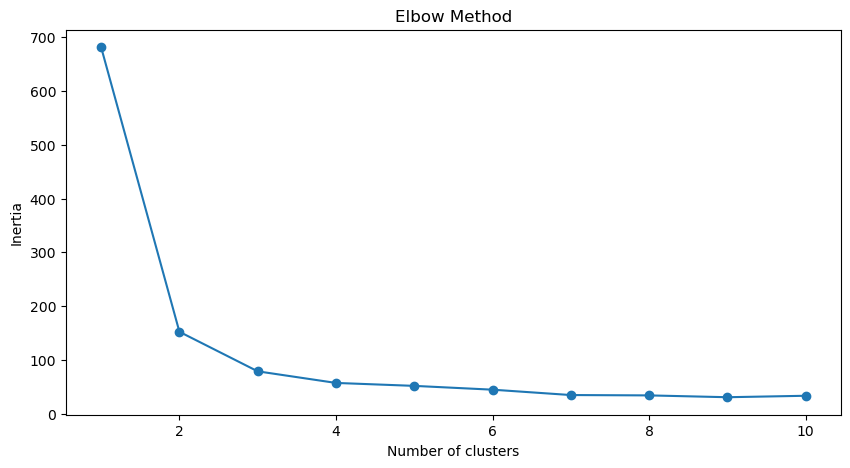

In [34]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(k_values, errors, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [35]:
kl = KneeLocator(k_values, errors, curve='convex', direction='decreasing')
# kl.elbow
print(f"Le nombre optimal de clusters est {kl.elbow}")

Le nombre optimal de clusters est 3


In [36]:
clf_columns = []
clf_compare = pd.DataFrame(columns = clf_columns)

row_index = 0
cluster = 1
k_range = range(1, 11)
for _ in errors:
    clf_compare.loc[row_index,'Clusters (k=)'] = cluster
    clf_compare.loc[row_index,'Inertia'] = _  
    row_index+=1
    cluster +=1
    
clf_compare.sort_values(by = ['Inertia'], ascending = False, inplace = True)    
clf_compare

,Clusters (k=),Inertia
0,1.0,681.370600
1,2.0,152.347952
2,3.0,78.855666
3,4.0,57.282082
4,5.0,51.805043
5,6.0,44.728960
6,7.0,34.756750
7,8.0,34.101187
9,10.0,33.416346
8,9.0,30.711739


**L'inertie mesure la somme des distances au ² entre les points de données et le centroïde auquel elles sont affectées.  
Moins il y a de variation au sein des clusters, plus les points de données sont similaires au sein du même cluster.**

## Évaluation de la qualité des clusters. 
    Coefficient de Silhouette

In [37]:
silhouette_scores = []
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

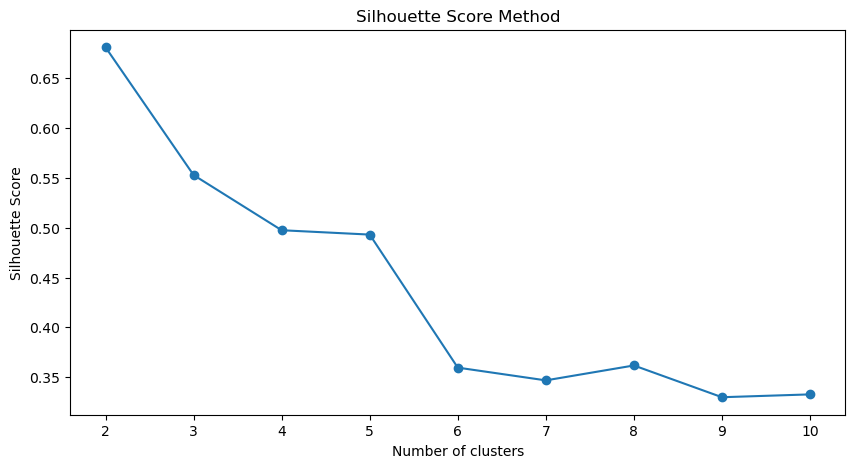

In [38]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()

**Le coefficient de silhouette mesure à quel point une valeur est similaire à son propre cluster.  
Celui-ci varie de -1 à 1 :**
- plus il se rapproche de 1, plus il indique un cluster bien séparés avec une cohésion élevée
- plus il se rapproche de -1, plus il suggère un cluster qui se chevauche ou mal séparé
- une valeur autour de 0 indique une affectation ambiguë